<a href="https://colab.research.google.com/github/Naveen64Gudipati/ML_Algorithms/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
#independent features
X=df.iloc[:,:-1]#excpet variety remaining will be selected
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
#Dependent features
y=df.iloc[:,-1]#here all rows and variety column will be selected
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [13]:
#train test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
#intialzing the decision tree model
from sklearn.tree import DecisionTreeClassifier


In [16]:
dec_tree=DecisionTreeClassifier(max_depth=2)

In [17]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

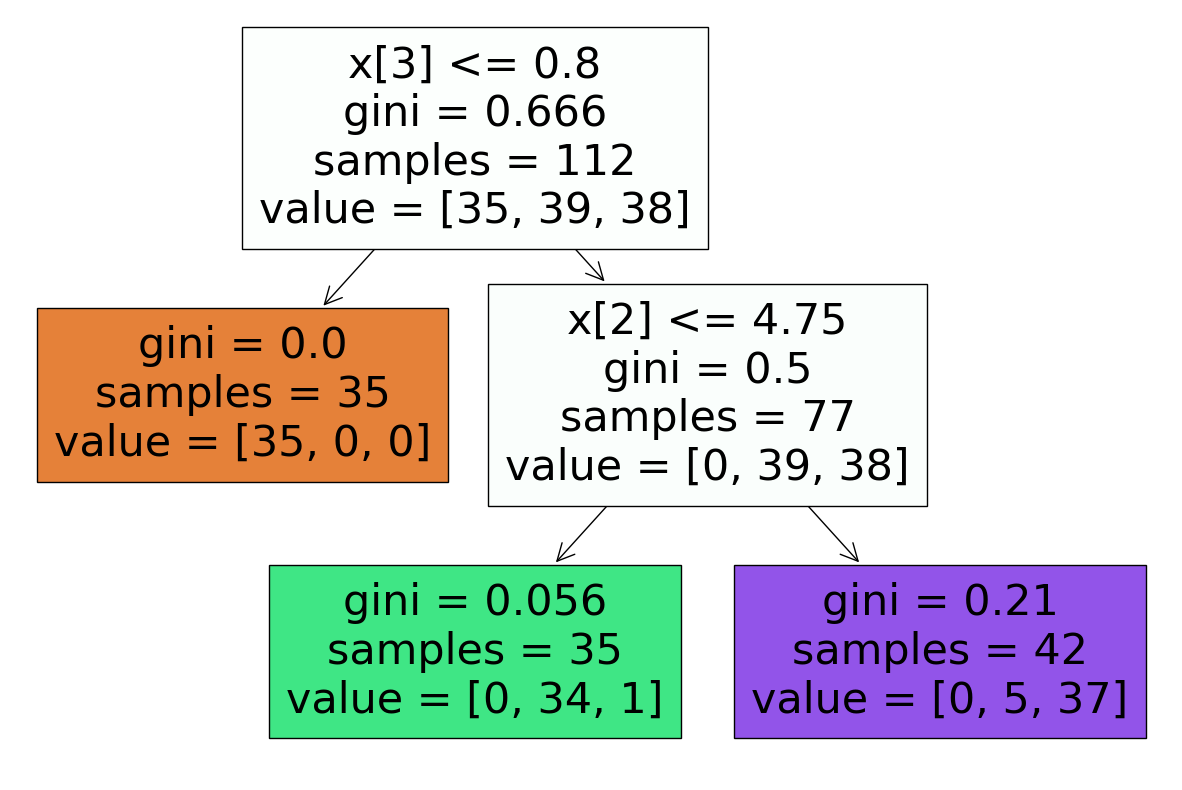

In [18]:
#used to construct a tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dec_tree,filled=True)

In [19]:
#prediction
y_pred=dec_tree.predict(X_test)

In [20]:
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa'], dtype=object)

In [21]:
#accuracy
from sklearn.metrics import accuracy_score,classification_report

In [22]:
score=accuracy_score(y_pred,y_test)
print(score)

0.9736842105263158


In [23]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [24]:
#pre-puning
parameters={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2'],
    'ccp_alpha':[1,2,3,4,5,6]
}

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameters,cv=5,scoring='accuracy')

In [27]:
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [28]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [29]:
y_test

73     Versicolor
18         Setosa
118     Virginica
78     Versicolor
76     Versicolor
31         Setosa
64     Versicolor
141     Virginica
68     Versicolor
82     Versicolor
110     Virginica
12         Setosa
36         Setosa
9          Setosa
19         Setosa
56     Versicolor
104     Virginica
69     Versicolor
55     Versicolor
132     Virginica
29         Setosa
127     Virginica
26         Setosa
128     Virginica
131     Virginica
145     Virginica
108     Virginica
143     Virginica
45         Setosa
30         Setosa
22         Setosa
15         Setosa
65     Versicolor
11         Setosa
42         Setosa
146     Virginica
51     Versicolor
27         Setosa
Name: variety, dtype: object

In [30]:
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa'], dtype=object)

In [31]:
y_pred=cv.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
score=accuracy_score(y_pred,y_test)
score

0.2894736842105263

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00         0
  Versicolor       1.00      0.29      0.45        38
   Virginica       0.00      0.00      0.00         0

    accuracy                           0.29        38
   macro avg       0.33      0.10      0.15        38
weighted avg       1.00      0.29      0.45        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
